# Pair Plot

From this visualization, what features are we going to use for the logistic regression?

## Results
We can see that `Arithmancy` and `Care of Magical Creatures` cannot classify well.
These features will be dropped before training.

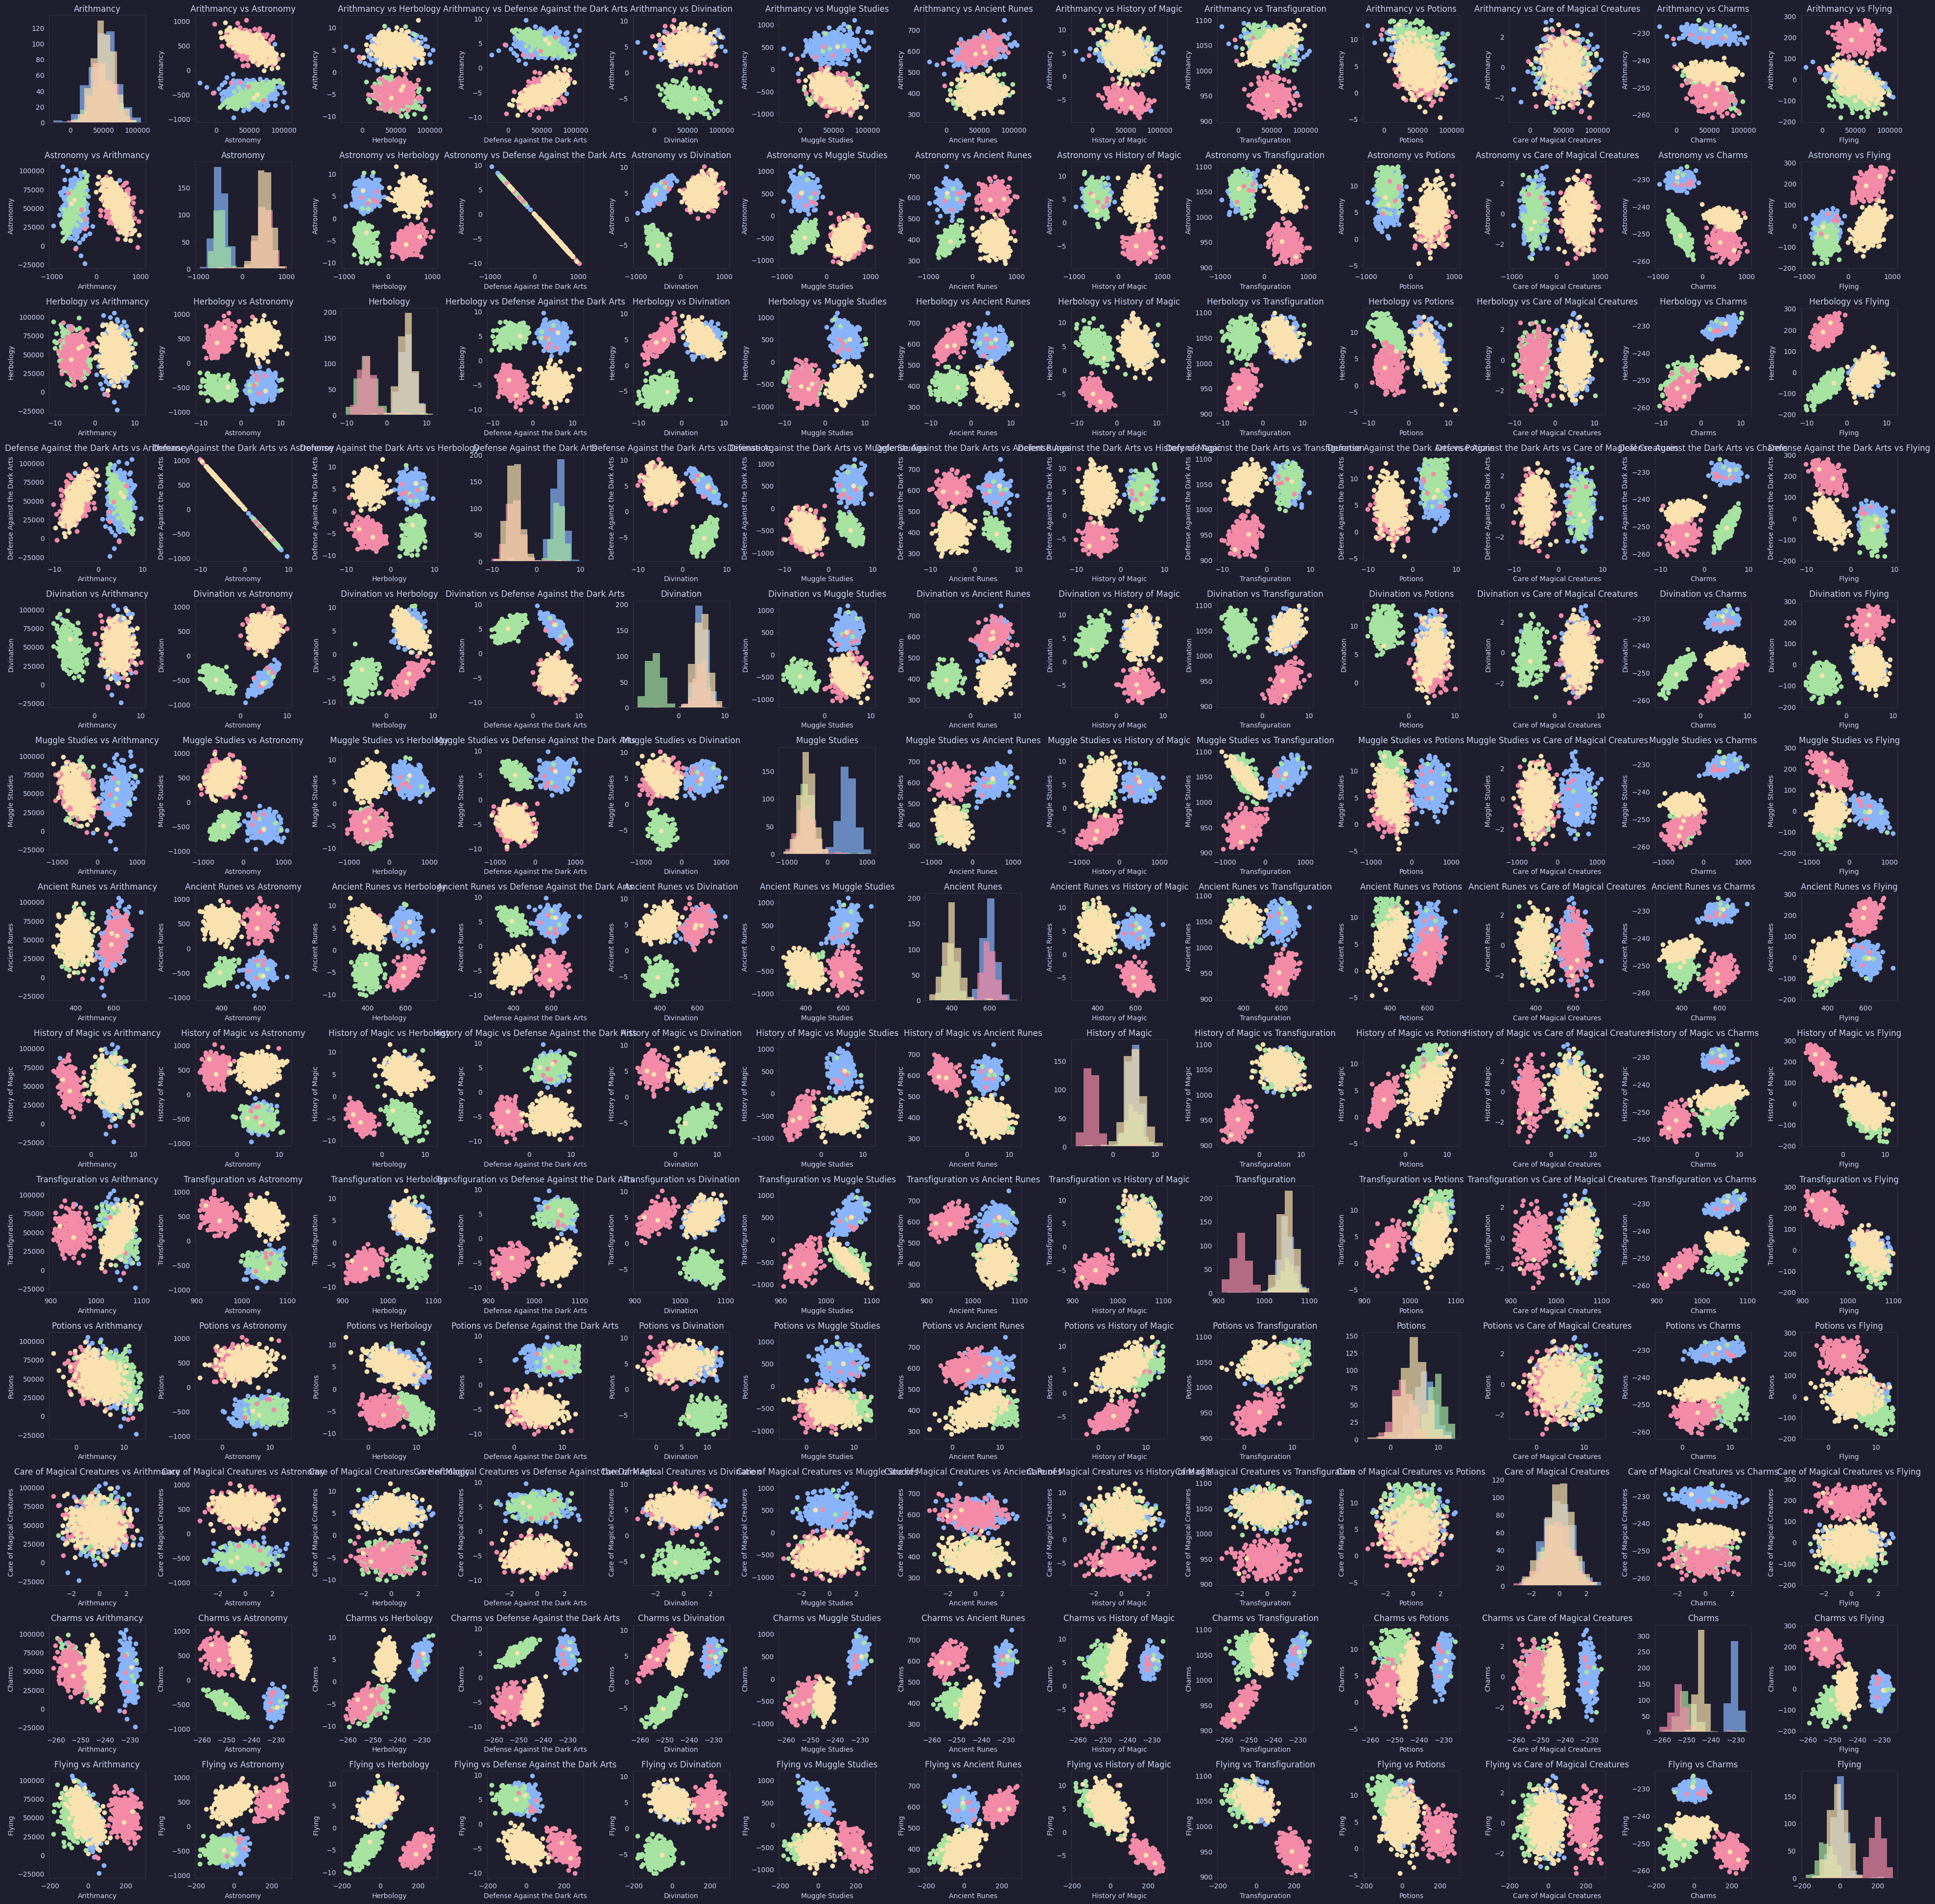

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplcatppuccin.palette import load_color
import itertools
import mplcatppuccin

mpl.style.use('mocha')

%run "utils.ipynb"

df = get_data()

houses = df['Hogwarts House'].unique()
colors = [load_color("mocha", "blue"), load_color("mocha", "green"), load_color("mocha", "red"), load_color("mocha", "yellow")]

# filter numeric features
columns = df.select_dtypes(include=['number']).columns

feature_combinations = list(itertools.product(columns, repeat=2))

# Set up the plot grid
num_plots = len(feature_combinations)
num_cols = 13
num_rows = (num_plots - 1) // num_cols + 1

# Create figure and subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(3*num_cols, 3*num_rows))

# Flatten axes if needed (in case num_rows = 1)
axes = axes.flatten() if num_rows > 1 else [axes]

for i, (feature1, feature2) in enumerate(feature_combinations):
    for house, color in zip(houses, colors):
        house_data = df[df['Hogwarts House'] == house]
        ax = axes[i]
        if feature1 == feature2:
            ax.hist(house_data[feature1], bins=10, alpha=0.7, label=house, color=color)
            ax.set_title(f'{feature1}')
        else:
            ax.scatter(house_data[feature1], house_data[feature2], color=color, label=house)
            ax.set_ylabel(feature1)
            ax.set_xlabel(feature2)
            ax.set_title(f'{feature1} vs {feature2}')

plt.tight_layout()
plt.show()